# The coordinates of the points of interests (POI)  from Foursquare

This notebook shows how to scrape from a foursquare and then cluster the POIs based on their spatial distance to each other.

## Setup 

The imports below refert from conde or pip- installable packages

In [1]:
import re, requests
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


## 1. Collecting and pansing a webpage



In [2]:
# Website link 
web_url = "https://foursquare.com/explore?mode=url&near=Karlsruhe%2C%20Germany&nearGeoId=72057594040820730"

# Collet and parse page 
page_request = requests.get(web_url)

# Create a BeautifulSoup object 
soup_data = BeautifulSoup(page_request.text, 'html.parser')

# Extract text from website
sliced_text = [item for item in soup_data.findAll(text=True) if "fourSq.config.explore" in item]

## 2. Extract coordinates of the points of interests

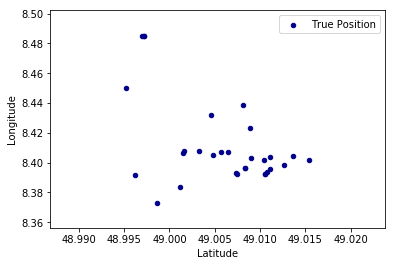

In [3]:
# Code the coordinates of the points of interests and created panda frame 
df = pd.DataFrame(re.findall(r'"display","lat":(.*?),"lng":(.*?)}',sliced_text[0].encode("utf-8")), columns=["Latitude","Longitude"], dtype='float')

# Name of the places and ID
# iD_name = re.findall(r'"venue":{"id":"(.*?),"name":"(.*?)",',sliced_text[0].encode("utf-8"))
df.plot.scatter(x='Latitude', y='Longitude', color='DarkBlue', label='True Position');  

## 3. Cluster the POIs based on their spatial distance to each other by using K-means 

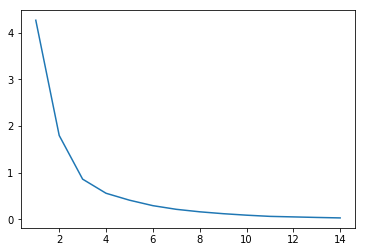

In [4]:
sum_of_squared_distances = []
# Find the optimal number of clusters 
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)
for n_cluster in range(1, 15):
    # Inertia: Sum of distances of samples to their closest cluster center
    sum_of_squared_distances.append(KMeans(n_cluster).fit(scaled_df).inertia_)    
# Elbow    
plt.plot(range(1, 15),sum_of_squared_distances)   

## 4. Results 

In [5]:
# The graph in section 3 helps to identify the elbow for the optimal number of culsters 
kmeans = KMeans(n_clusters=4) 
X = df.loc[:,["Latitude","Longitude"]]
# Fit the k-means cluster
kmeans.fit(X) 
centers = kmeans.cluster_centers_

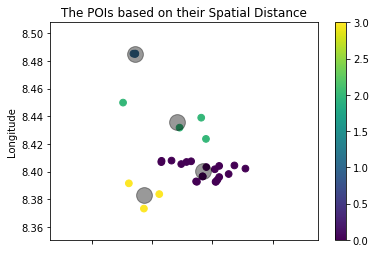

In [7]:
# Plot the data prediction 
df.plot.scatter(x='Latitude', y='Longitude', color= kmeans.predict(X), s=45, cmap='viridis');
# Plot the centers 
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=250, alpha=0.4);
plt.title('The POIs based on their Spatial Distance');